<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/practice-gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotten Tomatoes: Top 100 Movies of All Time
References:
- [Rotten Tomatoes: Top 100](https://www.rottentomatoes.com/top/bestofrt/)

In [1]:
# Import dependencies
import requests
import zipfile
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt

## Flat Files

In [2]:
path = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ca594d_bestofrt/'
df1 = pd.read_csv(path+'bestofrt.tsv', sep='\t')
df1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## HTML Files

In [3]:
# First: Upload rt-html.zip to the workspace
# (copying .zip file using curl didn't work)
os.makedirs('rt_html', exist_ok=True)
# Extract ZIP file
with zipfile.ZipFile('rt-html.zip', 'r') as myzip:
  myzip.extractall()

In [13]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
    title = soup.find('title').text[:-len(' - Rotten Tomatoes')].replace(u'\xa0', u' ')
    audience_score = soup.find('div', class_='audience-score meter').find('span').text[:-1]
    soup.find('div', class_='audience-score meter').next_sibling()[2].span.extract()
    num_audience_ratings = soup.find('div', class_='audience-score meter').next_sibling()[2].text
    num_audience_ratings = num_audience_ratings.lstrip().replace(',','')

    # Append to list of dictionaries
    df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df2 = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [14]:
df2.head()

,title,audience_score,number_of_audience_ratings
0,Selma (2015),86,60533
1,Metropolis (1927),92,62018
2,Baby Driver (2017),89,48114
3,M (1931),95,35778
4,Apocalypse Now (1979),94,284606


In [17]:
df = df1.merge(df2, on='title')
df.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081
3,4,99,Get Out (2017),282,87,63837
4,5,97,Mad Max: Fury Road (2015),370,86,123937


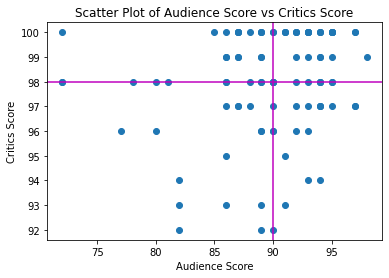

In [24]:
plt.scatter(df.audience_score, df.critic_score)
plt.title('Scatter Plot of Audience Score vs Critics Score')
plt.xlabel('Audience Score')
plt.ylabel('Critics Score')
plt.axvline(df.audience_score.median(), c='m')
plt.axhline(df.critic_score.median(), c='m')
plt.show()

## Text Files

## JSON Files